# Part-I: GDP Analysis of the Indian States
## Part I-A:

In [339]:
import numpy as np
import pandas as pd
#Please change the below location of the filepath for desired resut
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\GDP_Analysis\GDP_Assignment_Files\State_wise_Gross_Domestic_Product_GDP_at_current_price_on_yearly_basis.csv")
b = ['Andaman_&_Nicobar_Islands','Chandigarh','Delhi','Puducherry','Daman_&_Du','Dadra_&_Nagar_Haveli','Lakshadweep']
# replace space wirh "_" in column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

# Remove Union Territories
for i in df.columns:
    if i in b:
        df.drop(i,axis = 1,inplace=True)

#Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (in Crore)' for the year 2016-17.
for i in range(len(df.Items__Description)):
    if df.Duration[i] == "2016-17":
        if df.Items__Description[i] =="(% Growth over previous year)" or (df.Items__Description[i] =="GSDP - CURRENT PRICES (` in Crore)"):
            df.drop(index = i,inplace = True)
df

,Items__Description,Duration,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,Jammu_&_Kashmir,Jharkhand,Karnataka,Kerala,Madhya_Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand,West_Bengal1,All_India_GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,72720.00,78254.00,150918.00,603778.00,364048.00,315561.00,1272967.00,12915.00,19918.00,7259.0,11839.00,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,NaN,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,82820.00,87105.00,174724.00,691700.00,412313.00,380924.00,1448466.00,13748.00,21872.00,8362.0,13619.00,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,NaN,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,94764.00,95893.00,188567.00,817886.00,465041.00,437737.00,1647506.00,16198.00,22938.00,10293.0,16612.00,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,NaN,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,104369.00,100404.00,217107.00,921788.00,526002.00,481982.00,1792122.00,18043.00,24408.00,11559.0,18414.00,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,NaN,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,NaN,118387.00,241955.00,1027068.00,588337.00,543975.00,NaN,NaN,26745.00,NaN,NaN,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,15.77,14.56,13.26,20.71,13.79,6.45,9.81,15.2,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,NaN,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,7.92,18.24,12.79,14.91,13.74,17.83,4.87,23.1,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,NaN,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,15.14,12.70,13.11,10.11,8.78,11.39,6.41,12.3,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,NaN,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,11.44,11.42,11.85,12.86,NaN,NaN,9.58,NaN,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,NaN,9.99


#### Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16

In [340]:
#Data Preparation
df1 = df[(df.Items__Description =="(% Growth over previous year)") & ((df.Duration =="2013-14") | (df.Duration =="2014-15") | (df.Duration =="2015-16"))]
df1 = df1.T
df1 = df1.iloc[1:]
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
a = df1.iloc[0]
df1.columns = a
df1 = df1.iloc[1:]
df1.rename(columns={'Duration':'State'},inplace = True)
df1['Mean'] = df1[['2013-14','2014-15','2015-16']].mean(axis=1)
df1 = df1.sort_values('Mean',ascending = False)
df2 = df1[df1.State =="All_India_GDP"]
#df2.rename(columns={'All_India_GDP':'All India GDP'},inplace = True)
df1 = df1[(df1.State !="All_India_GDP") & (df1.State !="West_Bengal1") & (df1.State !="Index")] # Removed West Bengal as it does not have any data
df3 = pd.concat([df1,df2],axis = 0)
df3.replace('_', ' ', regex=True,inplace=True)
df3

,State,2013-14,2014-15,2015-16,Mean
18,Mizoram,23.10,12.30,NaN,17.700000
26,Tripura,18.14,15.92,NaN,17.030000
19,Nagaland,21.98,10.85,NaN,16.415000
16,Manipur,17.83,11.39,NaN,14.610000
2,Arunachal Pradesh,16.38,14.79,12.07,14.413333
12,Karnataka,18.24,12.70,11.42,14.120000
1,Andhra Pradesh,12.85,13.40,15.85,14.033333
5,Chhattisgarh,16.44,13.69,10.98,13.703333
4,Bihar,12.30,17.92,10.59,13.603333
25,Telangana,12.63,13.05,12.61,12.763333


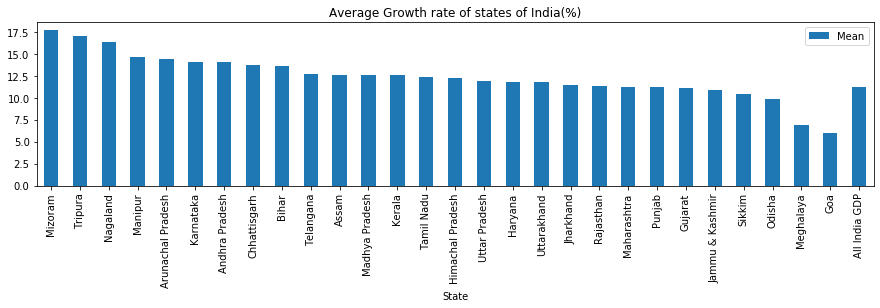

In [341]:
import matplotlib.pyplot as plt
df3.plot.bar(x='State', y='Mean',figsize=(15,3))
#plt.ylabel('Average Growth rate (%)')
plt.title('Average Growth rate of states of India(%)')
plt.show()

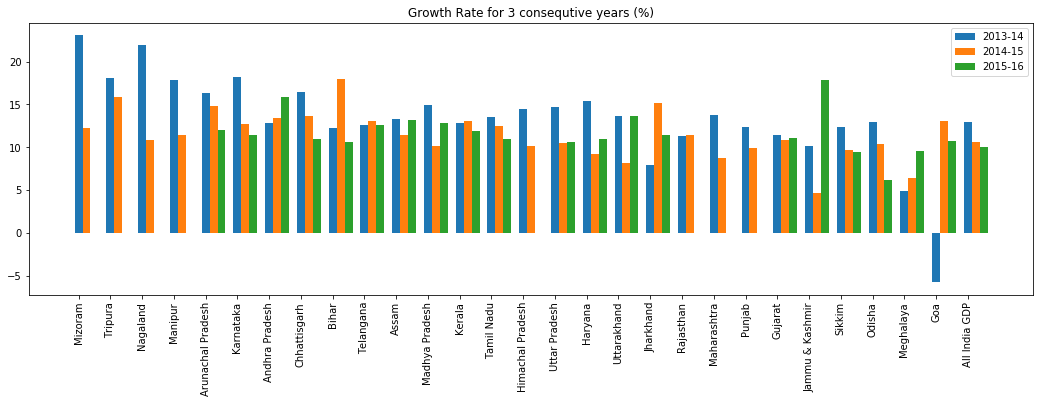

In [342]:
w = 0.25
bar1 = np.array(df3.iloc[:,1])
bar1 = list(bar1)
bar2 = np.array(df3.iloc[:,2])
bar2 = list(bar2)
bar3 = np.array(df3.iloc[:,3])
bar3 = list(bar3)
a = np.array(df3.iloc[:,0])
a = list(a)
a1 = np.arange(len(bar1))
a2 = [i+w for i in a1]
a3 = [i+w for i in a2]
plt.figure(figsize=(18,5))
plt.bar(a1,bar1,width =w)
plt.bar(a2,bar2,width =w)
plt.bar(a3,bar3,width =w)
plt.xticks([r for r in range(len(a1))], a,rotation = 90)
plt.legend(['2013-14', '2014-15', '2015-16'], loc='upper right')
#plt.ylabel('% Growth over previous year')
plt.title('Growth Rate for 3 consequtive years (%)')
plt.show()

Average growth rate ( for the years from 2013 to 2016) of all states are plotted on the first graph in descending order. As per the first graph,Mizoram is highest in terms of average growth Rate followed by Tripura, Nagaland & Manipur.

However, if we further drill-down to sencond graph,it is clear that there is a sharp decrease in growth rate for Mizoram where 2013-14 had seen a huge Growth compare to previous year which is actually making the state to top the list though they do not have latest year data available.This trend can be seen for Tripura,Nagaland & Manipur too. 

States whcih are growing consistently are Andhra Pradesh(15.85%;+2.45 Percentage Point YoY) & Meghalaya(9.58%,+3.17 Percentage Point YoY) . Though there was a dip in grwoth rate in 2014-15,Jammu & Kashmir has shown a huge increase in 2015-16(17.91%,+13.21 Percentage Point YoY).

For most of the states growth is in struggling phase. 
 States where continious decline is in place: Goa,Odisha,Tamil Nadu,Chhattisgarh,Karnataka,Sikkim
 States where the trend is inconsistent: Bihar,Telangana,Assam,Madhya Pradesh,Kerala,Haryana,Uttarakhand,Jharkhand


#### Homestate vs.national average

In [343]:
#Data Preparation
df_home = df3[df3.State=="Telangana"]
df4 = pd.concat([df2,df_home],axis=0)
df4
df4.replace('_',' ',regex = True,inplace = True)
df4

,State,2013-14,2014-15,2015-16,Mean
30,All India GDP,12.97,10.65,9.99,11.203333
25,Telangana,12.63,13.05,12.61,12.763333


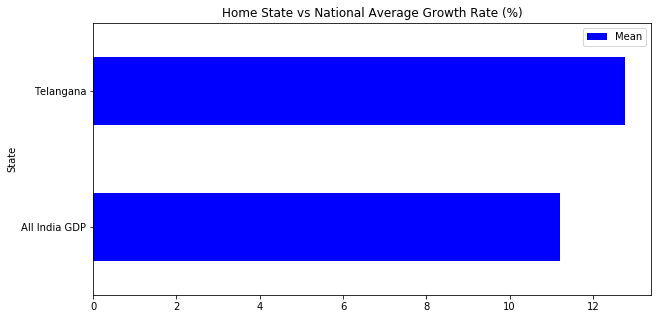

In [344]:
df4.plot.barh(x='State', y='Mean',figsize=(10,5),color = 'blue')
plt.title("Home State vs National Average Growth Rate (%)")
plt.show()

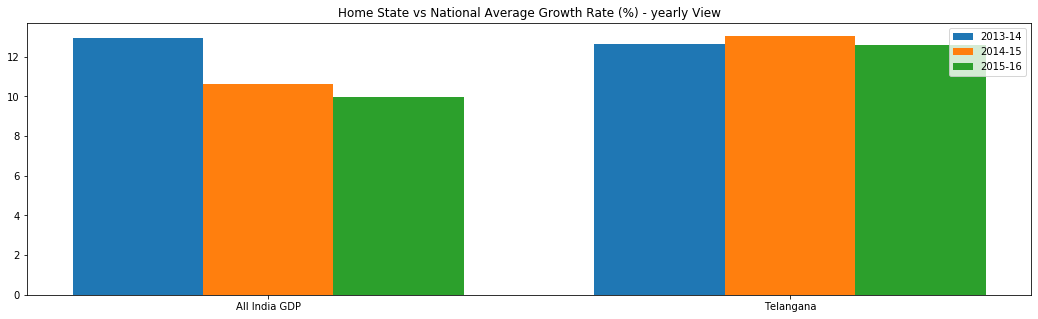

In [345]:
w = 0.25
bar1 = np.array(df4.iloc[:,1])
bar1 = list(bar1)
bar2 = np.array(df4.iloc[:,2])
bar2 = list(bar2)
bar3 = np.array(df4.iloc[:,3])
bar3 = list(bar3)
a = np.array(df4.iloc[:,0])
a = list(a)
a1 = np.arange(len(bar1))
a2 = [i+w for i in a1]
a3 = [i+w for i in a2]
plt.figure(figsize=(18,5))
plt.bar(a1,bar1,width =w)
plt.bar(a2,bar2,width =w)
plt.bar(a3,bar3,width =w)
plt.xticks([r+w for r in range(len(a2))], a)
plt.legend(['2013-14', '2014-15', '2015-16'], loc='upper right')
#plt.ylabel('% Growth over previous year')
plt.title('Home State vs National Average Growth Rate (%) - yearly View')
plt.show()

Telangana(12.76%) is doing comparatively slightly good interms of average grwoth rate when compared to national growth rate(11.20%). However, if we look further in detail by month wise growth rate view, national average is continiously decreasing while Telangan is unstable.

#### #Plot the total GDP of the states for the year 2015-16:

In [346]:
#Data Preparation
df5 = df[(df.Items__Description !="(% Growth over previous year)") & ((df.Duration =="2015-16"))]
df5=df5.T
df5 = pd.DataFrame(df5)

df5 = df5.iloc[1:]
df5 = df5.reset_index()
a = df5.iloc[0]
df5.columns = a
df5 = df5.iloc[1:]
df5.rename(columns={'Duration':'State'},inplace = True)
df5 =df5.dropna()
df5 = df5.sort_values('2015-16',ascending=False)
df5['2015-16'] = df5['2015-16'].astype(int)
df5 = df5[(df5.State !="All_India_GDP") & (df5.State !="Index")]
df5.replace('_', ' ', regex=True,inplace=True)
df5

,State,2015-16
24,Tamil Nadu,1212668
27,Uttar Pradesh,1153795
12,Karnataka,1027068
7,Gujarat,994316
1,Andhra Pradesh,609934
13,Kerala,588337
25,Telangana,575631
14,Madhya Pradesh,543975
8,Haryana,485184
4,Bihar,413503


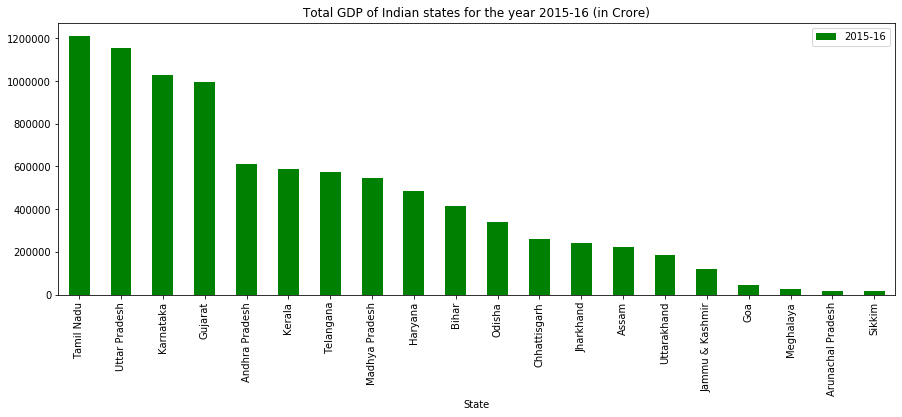

In [347]:
df5.plot.bar(x='State', y='2015-16',figsize=(15,5),color = 'green')
#plt.ylabel("Total GDP (in Crore)")
plt.title("Total GDP of Indian states for the year 2015-16 (in Crore)")
plt.show()

Tamil Nadu is highest in total GDP followed by Uttar Pradesh and Karnataka. However, Sikkim & Arunachal Pradesh are at last.

#### Identify the top 5 and the bottom 5 states based on total GDP 2015-16.

In [348]:
df_top = df5.head(5)
df_top

,State,2015-16
24,Tamil Nadu,1212668
27,Uttar Pradesh,1153795
12,Karnataka,1027068
7,Gujarat,994316
1,Andhra Pradesh,609934


In [349]:
df_bottom = df5.tail(5)
df_bottom

,State,2015-16
10,Jammu & Kashmir,118387
6,Goa,45002
17,Meghalaya,26745
2,Arunachal Pradesh,18784
23,Sikkim,16637


As per the above graph,it can be clearly seen that Top 5 states are Tamil Nadu,Uttar Pradesh,Karnataka,Gujarat & Andhra Pradesh 
respectively in terms of total GDP for 2015-16

And the bottom 5 states are Sikkim,Arunachal Pradesh,Meghalaya,Goa,Jammu & Kashmir

## Part I-B:

In [350]:
#Plot the GDP per capita for all the states.
import numpy as np
import pandas as pd
import glob,os

In [351]:
#Please change the below location of the filepath for desired resut
path = r'C:\Users\91973\Desktop\Data_Science\GDP_Analysis\GDP_Assignment_Files\Indian States' 
# Reading all the paths
all_files = glob.glob(path+"\\*.csv")

In [352]:
li = []
x =  ['Andaman_Nicobar_Islands','Chandigarh','Delhi','Puducherry','Daman_&_Du','Dadra_&_Nagar_Haveli','Lakshadweep']
for filenames in all_files:
    df = pd.read_csv(filenames)
    df = df[['Item','2014-15']]
    df = df.T
    a = df.iloc[0]
    df.columns = a
    df = df[1:]
    df.loc[:,'State']=filenames.split('\\')[-1].split('.')[0].split('-')[1]
    li.append(df)
frame = pd.concat(li,axis = 0,ignore_index = True,sort=True)
df1 = frame
df1 = df1[['Per Capita GSDP (Rs.)','State']]
df1 = df1.reset_index()
df1.drop(columns = 'index',inplace = True)
# Filter out the union territories
for i in range(len(df1.State)):
    if df1.State[i] in x:
        df1.drop(index = i,inplace = True)
df1 = df1.sort_values('Per Capita GSDP (Rs.)',ascending = False)   
df1 = df1[['State','Per Capita GSDP (Rs.)']]
df1.rename(columns={'Per Capita GSDP (Rs.)':'Per Capita GSDP (Rs.) 2014-15'},inplace=True)
df5_3 = df1
df1.replace('_', ' ', regex=True,inplace=True)
df1

,State,Per Capita GSDP (Rs.) 2014-15
8,Goa,271793.0
25,Sikkim,240274.0
10,Haryana,164077.0
14,Kerala,154778.0
29,Uttarakhand,153076.0
16,Maharashtra,152853.0
11,Himachal Pradesh,147330.0
26,Tamil Nadu,146503.0
13,Karnataka,145141.0
9,Gujarat,141263.0


#### Plot the GDP per capita for all the states

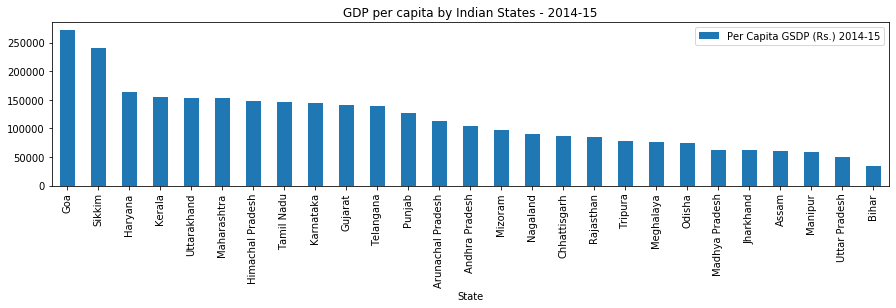

In [353]:
import matplotlib.pyplot as plt
df1.plot.bar(x = 'State',y='Per Capita GSDP (Rs.) 2014-15',figsize=(15,3))
plt.title("GDP per capita by Indian States - 2014-15")
plt.show()

#### Identify the top 5 and the bottom 5 states based on total GDP 2014-15.

In [354]:
df_top = df1.head(5)
df_top

,State,Per Capita GSDP (Rs.) 2014-15
8,Goa,271793.0
25,Sikkim,240274.0
10,Haryana,164077.0
14,Kerala,154778.0
29,Uttarakhand,153076.0


In [355]:
df_bottom = df1.tail(5)
df_bottom

,State,Per Capita GSDP (Rs.) 2014-15
12,Jharkhand,62091.0
3,Assam,60621.0
17,Manipur,58442.0
30,Uttar Pradesh,49450.0
4,Bihar,33954.0


#### Find the ratio of the highest per capita GDP to the lowest per capita GDP

In [356]:
df1.iloc[0,1]/df1.iloc[-1,1]

8.004741709371503

#### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [357]:
#Data Preparation
df2 = frame[['State','Primary','Secondary','Tertiary','Gross State Domestic Product']]
df2 = df2.sort_values('Gross State Domestic Product',ascending = False)  
df2.rename(columns={'Gross State Domestic Product':'Gross_State_Domestic_Product'},inplace = True)
df2['Primary']=df2['Primary']*100/df2['Gross_State_Domestic_Product']
df2['Secondary']=df2['Secondary']*100/df2['Gross_State_Domestic_Product']
df2['Tertiary']=df2['Tertiary']*100/df2['Gross_State_Domestic_Product']
df2 = df2[['State','Primary','Secondary','Tertiary']]
# Filter out the union territories 
for i in range(len(df2.State)):
    if df2.State[i] in x:
        df2.drop(index = i,inplace = True)
df2
df2.replace('_', ' ', regex=True,inplace=True)
df2


,State,Primary,Secondary,Tertiary
16,Maharashtra,12.141131,26.474323,49.455948
26,Tamil Nadu,12.200454,30.059475,48.824418
30,Uttar Pradesh,24.918511,24.486707,44.058108
13,Karnataka,13.090107,22.222466,54.774663
9,Gujarat,17.750506,36.896684,33.764756
24,Rajasthan,31.221746,21.282116,42.495993
1,Andhra Pradesh,30.968080,19.923102,41.850453
14,Kerala,12.337288,22.946744,56.413780
27,Telangana,17.867280,19.413996,55.697682
15,Madhya Pradesh,37.042942,20.840810,37.589312


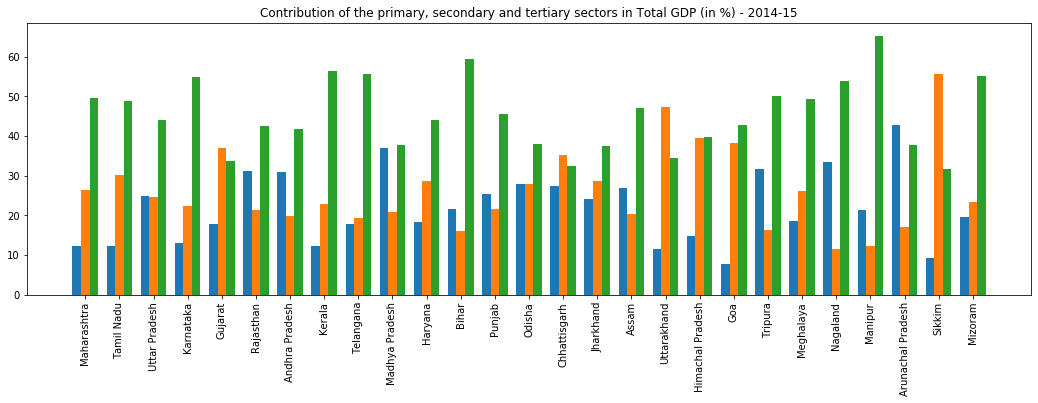

In [358]:
w = 0.25
bar1 = np.array(df2.iloc[:,1])
bar1 = list(bar1)
bar2 = np.array(df2.iloc[:,2])
bar2 = list(bar2)
bar3 = np.array(df2.iloc[:,3])
bar3 = list(bar3)
a = np.array(df2.iloc[:,0])
a = list(a)
a1 = np.arange(len(bar1))
a2 = [i+w for i in a1]
a3 = [i+w for i in a2]
plt.figure(figsize=(18,5))
plt.bar(a1,bar1,width =w)
plt.bar(a2,bar2,width =w)
plt.bar(a3,bar3,width =w)
plt.xticks([r+w for r in range(len(a1))], a,rotation = 90)
plt.title("Contribution of the primary, secondary and tertiary sectors in Total GDP (in %) - 2014-15")
plt.show()

In 2014-15, Tertiary sector had a major contribution in GDP. Which means service sector had dominated more on GDP contribution where Agricultural sector or Primary sector was least productive. However, secondary or Industry sector was performing in between.

Hence, it can be seen that Service Industry is growing in India rapidly compared to other two sectors. However, it also indicates that workforce from other sectors may moved to this industry in terms of for better opportunity which further can decrease the contribution of Primary and Secondary Sector’s contribution.

Hence, there are opportunity to grow in primary sector by developing agricultural sector in rural India and also there are opportunity in Mining sector to increase productivity

#### Categorise the states into four groups based on the GDP per capita

In [359]:
pd.set_option('display.max_columns', None)
#Please change the below location of the filepath for desired resut
path = r'C:\Users\91973\Desktop\Data_Science\GDP_Analysis\GDP_Assignment_Files\Indian States' 
# Reading all the paths
all_files = glob.glob(path+"\\*.csv")

li = []
x =  ['Andaman_Nicobar_Islands','Chandigarh','Delhi','Puducherry','Daman_&_Du','Dadra_&_Nagar_Haveli','Lakshadweep']
for filenames in all_files:
    df = pd.read_csv(filenames)
    df = df[['Item','2014-15']]
    df = df.T
    a = df.iloc[0]
    df.columns = a
    df = df[1:]
    df.loc[:,'State']=filenames.split('\\')[-1].split('.')[0].split('-')[1]
    li.append(df)
frame = pd.concat(li,axis = 0,ignore_index = True,sort=True)
df1 = frame
# Filter out the union territories
for i in range(len(df1.State)):
    if df1.State[i] in x:
        df1.drop(index = i,inplace = True)
df1 = df1.sort_values('Per Capita GSDP (Rs.)',ascending = False)
df1.rename(columns={'Per Capita GSDP (Rs.)':'Per_Capita_GSDP_Rs','Gross State Domestic Product':'Gross_State_Domestic_Product'},inplace = True)
df_c = df1
df_c['quantiles_20'] = df_c.Per_Capita_GSDP_Rs.quantile(0.20)
df_c['quantiles_50'] = df_c.Per_Capita_GSDP_Rs.quantile(0.50)
df_c['quantiles_85'] = df_c.Per_Capita_GSDP_Rs.quantile(0.85)
df_c['quantiles_1'] = df_c.Per_Capita_GSDP_Rs.quantile(1.0)
df_c['Category'] = 'C4'
df_c.loc[(df_c['Per_Capita_GSDP_Rs'] > df_c['quantiles_20']) & (df_c['Per_Capita_GSDP_Rs'] <= df_c['quantiles_50']), 'Category'] = 'C3'
df_c.loc[(df_c['Per_Capita_GSDP_Rs'] > df_c['quantiles_50']) & (df_c['Per_Capita_GSDP_Rs'] <= df_c['quantiles_85']), 'Category'] = 'C2'
df_c.loc[(df_c['Per_Capita_GSDP_Rs'] > df_c['quantiles_85']) & (df_c['Per_Capita_GSDP_Rs'] <= df_c['quantiles_1']), 'Category'] = 'C1'
df_c

,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross_State_Domestic_Product,Hotels & restaurants,Livestock,Manufacturing,Mining and quarrying,Other services,Per_Capita_GSDP_Rs,Population ('00),Primary,Public administration,Railways,"Real estate, ownership of dwelling & professional services",Road transport,Road transport*,Road transport**,Secondary,Services incidental to transport,Services incidental to transport*,State,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Trade & repair services,Trade & repair services*,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport,quantiles_20,quantiles_50,quantiles_85,quantiles_1,Category
8,308507,46359,44028,165819,140421,204110,233618,122201,15744,4063307,37434,30141,1177608,3622,180431,271793,14950,312129,346486,15649,407099,46171,NaN,NaN,1547536,19272,NaN,Goa,357,61854,3597882,527279,1738217,343492,NaN,380927,189656,17820,65187.0,104977.0,153246.2,271793.0,C1
25,137447,0,12064,82058,114976,212499,21079,604,4529,1520933,5945,17338,550697,1329,149265,240274,6330,138776,119514,0,75330,35283,NaN,NaN,845253,0,NaN,Sikkim,0,18400,1467133,72200,483103,64624,NaN,70568,47347,0,65187.0,104977.0,153246.2,271793.0,C1
10,8.01524e+06,NaN,479658,3.70257e+06,4.63673e+06,1.10192e+06,1.67149e+06,110080,352254,4.37462e+07,168535,2.91617e+06,7.75692e+06,25186,2.00158e+06,164077,266620,8.04042e+06,1.03638e+06,423873,6.97018e+06,1.45236e+06,NaN,NaN,1.25614e+07,190269,NaN,Haryana,14459,1.06787e+06,3.98284e+07,4.98567e+06,1.92266e+07,4.81778e+06,NaN,4.98632e+06,2.56062e+06,NaN,65187.0,104977.0,153246.2,271793.0,C1
14,5930617,125029,884767,7314003,3070386,482470,2010306,704319,499808,52600230,793498,1656104,4273567,558824,5728645,154778,339843,6489442,2068915,147897,7287633,NaN,NaN,2761427,12070040,71567,NaN,Kerala,3290,822381,48233259,5189352,29673778,NaN,7763847,8557345,4020934,26956,65187.0,104977.0,153246.2,271793.0,C1
29,1.60142e+06,3889,733778,1.34273e+06,866146,433880,385030,4796,339293,1.61985e+07,209033,391188,5.86625e+06,244549,982430,153076,105820,1.84597e+06,579409,21295,831307,NaN,307147,NaN,7.64286e+06,-76,NaN,Uttarakhand,660,313139,1.50768e+07,1.43486e+06,5.58798e+06,1.53407e+06,NaN,1.74311e+06,1.06669e+06,NaN,65187.0,104977.0,153246.2,271793.0,C2
16,16475655,174188,2551115,9450211,10435121,4334702,16143324,475141,1592564,179212165,1552198,3972829,33660294,5282727,10806363,152853,1172450,21758383,5426991,797933,30718051,4644123,NaN,NaN,47445207,1175023,NaN,Maharashtra,131237,4017300,157834665,25394800,88631076,14286902,NaN,15839100,9697246,223626,65187.0,104977.0,153246.2,271793.0,C2
11,1514981,3979,194266,808256,853758,767268,362521,9968,540950,10436879,121333,110304,2543637,33385,923164,147330,70840,1548366,553974,2528,1125937,349608,NaN,NaN,4119162,1724,NaN,Himachal_Pradesh,129,259291,9800853,895317,4133326,494162,NaN,615496,552234,0,65187.0,104977.0,153246.2,271793.0,C2
26,13064238,180836,1903283,12216718,7297820,1710379,5598498,680352,392705,109256373,1643253,4693361,18914794,265536,7430115,146503,745760,13329774,3400800,468553,16830213,3660994,NaN,NaN,32841892,NaN,864407,Tamil_Nadu,39834,2766405,99515453,12507325,53343788,11252588,NaN,12895842,7188320,70414,65187.0,104977.0,153246.2,271793.0,C2
13,11219422,171785,1349520,6104799,8157179,1425762,4094169,500390,693082,92178806,1467938,1868771,12953843,846882,5308174,145141,635100,12066304,2232584,259482,24766393,3194576,NaN,NaN,20484404,55349,NaN,Karnataka,42787,1889206,83041338,11026674,50490630,7523720,NaN,8991658,5097652,24152,65187.0,104977.0,153246.2,271793.0,C2
9,1.377e+07,NaN,1.24252e+06,5.52602e+06,9.67109e+06,3.40998e+06,4.60664e+06,638357,761616,8.95027e+07,NaN,2.69891e+06,2.40875e+07,2.11722e+06,3.12341e+06,141263,633590,1.58872e+07,

In [360]:
df_c1 = df_c.loc[df_c['Category']=='C1',:]
df_c1 = df_c1[['Category','Gross_State_Domestic_Product',
    'Agriculture, forestry and fishing',
              'Mining and quarrying',
              'Manufacturing',
              'Electricity, gas, water supply & other utility services',
              'Construction',
              'Trade, repair, hotels and restaurants',
              'Transport, storage, communication & services related to broadcasting',
              'Financial services',
              'Real estate, ownership of dwelling & professional services',
              'Public administration',
              'Other services']]
df_c1 = df_c1.groupby('Category').sum()
df_c1 = df_c1.astype(float)
df_c1['Agriculture, forestry and fishing'] = df_c1['Agriculture, forestry and fishing']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Mining and quarrying'] = df_c1['Mining and quarrying']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Manufacturing'] = df_c1['Manufacturing']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Electricity, gas, water supply & other utility services'] = df_c1['Electricity, gas, water supply & other utility services']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Construction'] = df_c1['Construction']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Trade, repair, hotels and restaurants'] = df_c1['Trade, repair, hotels and restaurants']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Transport, storage, communication & services related to broadcasting']= df_c1['Transport, storage, communication & services related to broadcasting']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Financial services'] = df_c1['Financial services']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Real estate, ownership of dwelling & professional services'] = df_c1['Real estate, ownership of dwelling & professional services']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Public administration'] = df_c1['Public administration']*100/df_c1['Gross_State_Domestic_Product']
df_c1['Other services']= df_c1['Other services']*100/df_c1['Gross_State_Domestic_Product']
df_c1=df_c1.T
df_c1 =  df_c1.sort_values('C1',ascending = False)
df_c1 = df_c1.iloc[1:,]
df_c1
df_c1 = df_c1.reset_index()
df_c1.rename(columns={'index':'Category'},inplace = True)
df_c1['Cumulative_SUM'] = df_c1.C1.cumsum()
df_c1

Category,Category,C1,Cumulative_SUM
0,"Real estate, ownership of dwelling & professio...",14.461049,14.461049
1,"Agriculture, forestry and fishing",14.119213,28.580261
2,"Trade, repair, hotels and restaurants",13.730076,42.310337
3,Manufacturing,13.498187,55.808524
4,Construction,11.051090,66.859614
5,Other services,7.907258,74.766872
6,"Transport, storage, communication & services r...",6.689409,81.456281
7,Financial services,3.861928,85.318209
8,Public administration,3.503648,88.821857
9,"Electricity, gas, water supply & other utility...",1.963097,90.784954


In [326]:
df_c2 = df_c.loc[df_c['Category']=='C2',:]
df_c2 = df_c2[['Category','Gross_State_Domestic_Product',
    'Agriculture, forestry and fishing',
              'Mining and quarrying',
              'Manufacturing',
              'Electricity, gas, water supply & other utility services',
              'Construction',
              'Trade, repair, hotels and restaurants',
              'Transport, storage, communication & services related to broadcasting',
              'Financial services',
              'Real estate, ownership of dwelling & professional services',
              'Public administration',
              'Other services']]
df_c2 = df_c2.groupby('Category').sum()
df_c2 = df_c2.astype(float)
df_c2['Agriculture, forestry and fishing'] = df_c2['Agriculture, forestry and fishing']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Mining and quarrying'] = df_c2['Mining and quarrying']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Manufacturing'] = df_c2['Manufacturing']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Electricity, gas, water supply & other utility services'] = df_c2['Electricity, gas, water supply & other utility services']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Construction'] = df_c2['Construction']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Trade, repair, hotels and restaurants'] = df_c2['Trade, repair, hotels and restaurants']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Transport, storage, communication & services related to broadcasting']= df_c2['Transport, storage, communication & services related to broadcasting']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Financial services'] = df_c2['Financial services']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Real estate, ownership of dwelling & professional services'] = df_c2['Real estate, ownership of dwelling & professional services']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Public administration'] = df_c2['Public administration']*100/df_c2['Gross_State_Domestic_Product']
df_c2['Other services']= df_c2['Other services']*100/df_c2['Gross_State_Domestic_Product']
df_c2=df_c2.T
df_c2 =  df_c2.sort_values('C2',ascending = False)
df_c2 = df_c2.iloc[1:,]
df_c2 = df_c2.reset_index()
df_c2.rename(columns={'index':'Category'},inplace = True)
df_c2['Cumulative_SUM'] = df_c2.C2.cumsum()
df_c2

Category,Category,C2,Cumulative_SUM
0,Manufacturing,18.622130,18.622130
1,"Real estate, ownership of dwelling & professio...",15.710184,34.332314
2,"Agriculture, forestry and fishing",12.825977,47.158291
3,"Trade, repair, hotels and restaurants",10.443537,57.601828
4,Construction,6.932967,64.534795
5,Financial services,6.189947,70.724742
6,Other services,6.182617,76.907359
7,"Transport, storage, communication & services r...",5.755616,82.662975
8,Public administration,3.166513,85.829489
9,"Electricity, gas, water supply & other utility...",2.357408,88.186896


In [361]:
df_c3 = df_c.loc[df_c['Category']=='C3',:]
df_c3 = df_c3[['Category','Gross_State_Domestic_Product',
    'Agriculture, forestry and fishing',
              'Mining and quarrying',
              'Manufacturing',
              'Electricity, gas, water supply & other utility services',
              'Construction',
              'Trade, repair, hotels and restaurants',
              'Transport, storage, communication & services related to broadcasting',
              'Financial services',
              'Real estate, ownership of dwelling & professional services',
              'Public administration',
              'Other services']]
df_c3 = df_c3.groupby('Category').sum()
df_c3 = df_c3.astype(float)
df_c3['Agriculture, forestry and fishing'] = df_c3['Agriculture, forestry and fishing']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Mining and quarrying'] = df_c3['Mining and quarrying']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Manufacturing'] = df_c3['Manufacturing']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Electricity, gas, water supply & other utility services'] = df_c3['Electricity, gas, water supply & other utility services']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Construction'] = df_c3['Construction']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Trade, repair, hotels and restaurants'] = df_c3['Trade, repair, hotels and restaurants']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Transport, storage, communication & services related to broadcasting']= df_c3['Transport, storage, communication & services related to broadcasting']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Financial services'] = df_c3['Financial services']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Real estate, ownership of dwelling & professional services'] = df_c3['Real estate, ownership of dwelling & professional services']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Public administration'] = df_c3['Public administration']*100/df_c3['Gross_State_Domestic_Product']
df_c3['Other services']= df_c3['Other services']*100/df_c3['Gross_State_Domestic_Product']
df_c3=df_c3.T
df_c3 =  df_c3.sort_values('C3',ascending = False)
df_c3 = df_c3.iloc[1:,]
df_c3 = df_c3.reset_index()
df_c3.rename(columns={'index':'Category'},inplace = True)
df_c3['Cumulative_SUM'] = df_c3.C3.cumsum()
df_c3

Category,Category,C3,Cumulative_SUM
0,"Agriculture, forestry and fishing",23.727451,23.727451
1,Manufacturing,12.383423,36.110875
2,"Trade, repair, hotels and restaurants",9.690206,45.801080
3,"Real estate, ownership of dwelling & professio...",9.116395,54.917475
4,Construction,8.826341,63.743816
5,Other services,7.201032,70.944849
6,"Transport, storage, communication & services r...",6.872918,77.817767
7,Mining and quarrying,6.088662,83.906428
8,Public administration,4.454309,88.360737
9,Financial services,3.240065,91.600802


In [362]:
df_c4 = df_c.loc[df_c['Category']=='C4',:]
df_c4 = df_c4[['Category','Gross_State_Domestic_Product',
    'Agriculture, forestry and fishing',
              'Mining and quarrying',
              'Manufacturing',
              'Electricity, gas, water supply & other utility services',
              'Construction',
              'Trade, repair, hotels and restaurants',
              'Transport, storage, communication & services related to broadcasting',
              'Financial services',
              'Real estate, ownership of dwelling & professional services',
              'Public administration',
              'Other services']]
df_c4 = df_c4.groupby('Category').sum()
df_c4 = df_c4.astype(float)
df_c4['Agriculture, forestry and fishing'] = df_c4['Agriculture, forestry and fishing']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Mining and quarrying'] = df_c4['Mining and quarrying']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Manufacturing'] = df_c4['Manufacturing']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Electricity, gas, water supply & other utility services'] = df_c4['Electricity, gas, water supply & other utility services']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Construction'] = df_c4['Construction']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Trade, repair, hotels and restaurants'] = df_c4['Trade, repair, hotels and restaurants']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Transport, storage, communication & services related to broadcasting']= df_c4['Transport, storage, communication & services related to broadcasting']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Financial services'] = df_c4['Financial services']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Real estate, ownership of dwelling & professional services'] = df_c4['Real estate, ownership of dwelling & professional services']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Public administration'] = df_c4['Public administration']*100/df_c4['Gross_State_Domestic_Product']
df_c4['Other services']= df_c4['Other services']*100/df_c4['Gross_State_Domestic_Product']
df_c4=df_c4.T
df_c4 =  df_c4.sort_values('C4',ascending = False)
df_c4 = df_c4.iloc[1:,]
df_c4 = df_c4.reset_index()
df_c4.rename(columns={'index':'Category'},inplace = True)
df_c4['Cumulative_SUM'] = df_c4.C4.cumsum()
df_c4

Category,Category,C4,Cumulative_SUM
0,"Agriculture, forestry and fishing",24.323490,24.323490
1,"Trade, repair, hotels and restaurants",11.783216,36.106707
2,Manufacturing,10.712459,46.819166
3,"Real estate, ownership of dwelling & professio...",10.365410,57.184576
4,Construction,9.764521,66.949097
5,"Transport, storage, communication & services r...",6.941761,73.890858
6,Other services,6.799089,80.689947
7,Public administration,5.781998,86.471945
8,Financial services,3.294504,89.766449
9,Mining and quarrying,2.613661,92.380110


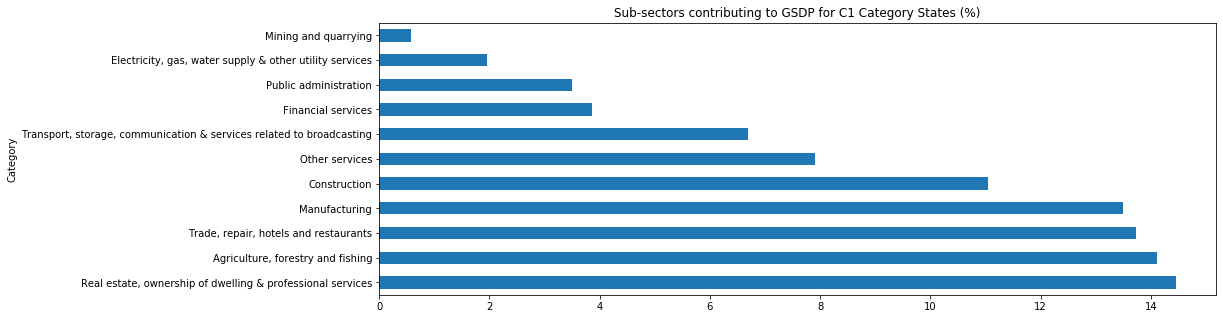

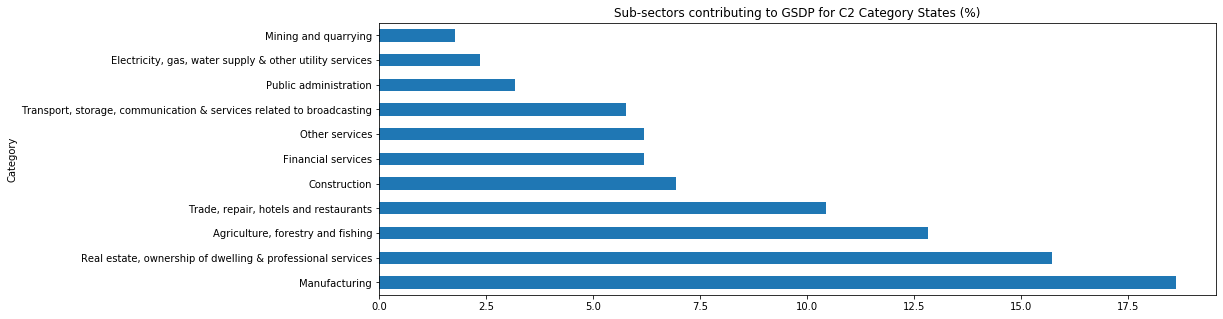

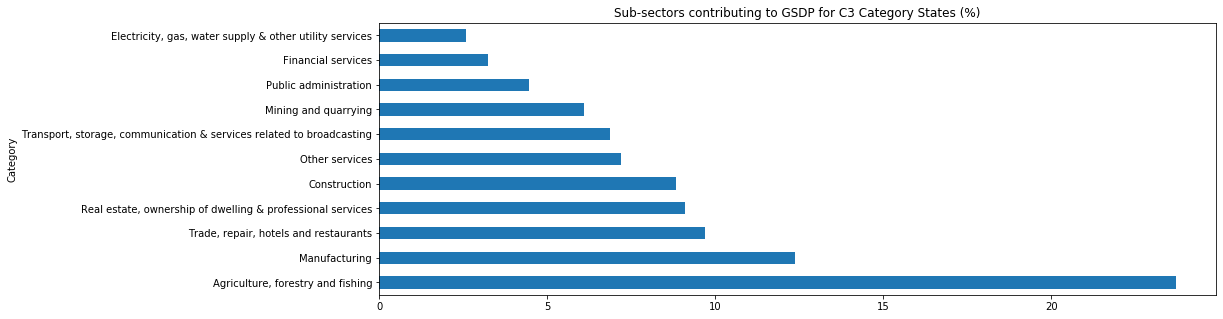

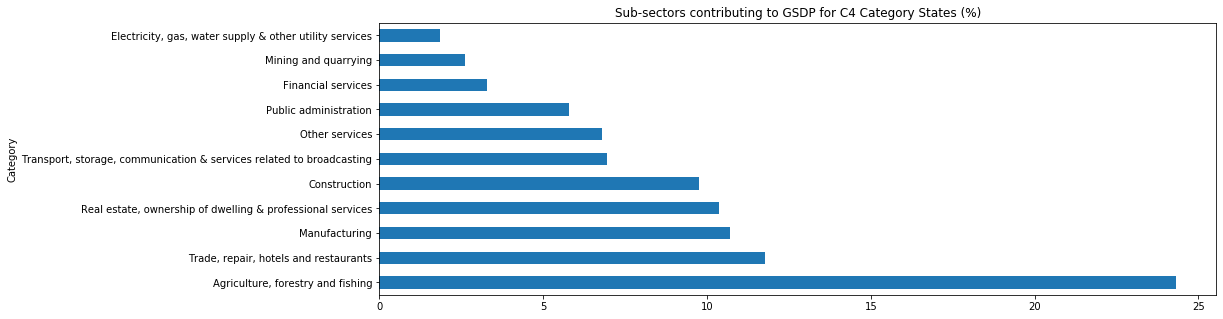

In [363]:
df_c1.plot.barh(x = 'Category',y='C1',figsize=(15,5),legend=None)
plt.title("Sub-sectors contributing to GSDP for C1 Category States (%)")
plt.show()

df_c2.plot.barh(x = 'Category',y='C2',figsize=(15,5),legend=None)
plt.title("Sub-sectors contributing to GSDP for C2 Category States (%)")
plt.show()

df_c3.plot.barh(x = 'Category',y='C3',figsize=(15,5),legend=None)
plt.title("Sub-sectors contributing to GSDP for C3 Category States (%)")
plt.show()

df_c4.plot.barh(x = 'Category',y='C4',figsize=(15,5),legend=None)
plt.title("Sub-sectors contributing to GSDP for C4 Category States (%)")
plt.show()


Tertiary sectors specially  Real estate, ownership of dwelling & professional services, Trade, repair, hotels and restaurants are majorly contributing to the total GDP

Through out all the categories of the states, Electricity, gas, water supply & other utility services , Financial services , Public administration and Mining and quarrying are very poorly performing in terms of contributing towards the total GDP






## Part-II: GDP and Education Dropout Rates

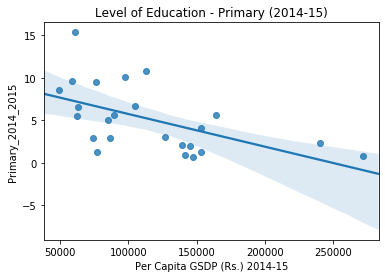

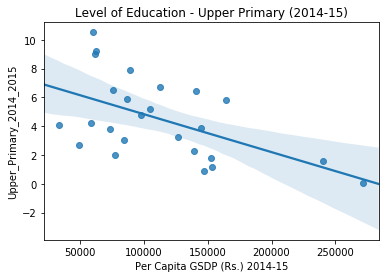

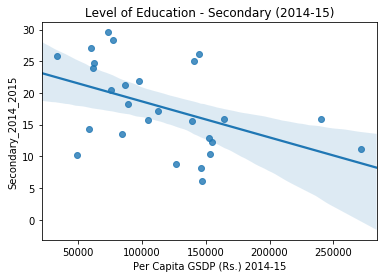

In [364]:
import seaborn as sns
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\GDP_Analysis\GDP_Assignment_Files\State UT-wise Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv")
df.rename(columns = {'Primary - 2014-2015':'Primary - 2013-2014'},inplace = True)
df.rename(columns = {'Primary - 2014-2015.1':'Primary - 2014-2015'},inplace = True)
a = ['State','Primary_2014_2015','Upper_Primary_2014_2015','Secondary_2014_2015']
df = df[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]
df.columns = a
df = df.replace({'State':{'A & N Islands':'Andaman & Nicobar Islands','Jammu and Kashmir':'Jammu & Kashmir','Chhatisgarh':'Chhattisgarh','Uttrakhand':'Uttarakhand','West Bengal':'West Bengal1'}})
df = df.loc[((df.State!='Andaman & Nicobar Islands')&(df.State!='Delhi') &(df.State!='Puducherry')& (df.State!='Chandigarh') & (df.State!='Daman & Diu') &  (df.State!='Dadra & Nagar Haveli') &  (df.State!='Lakshadweep')& (df.State!='West Bengal1')& (df.State!='All India')),:]
df5_2 =df
df5_4 = pd.merge(df5_2,df5_3,how = 'left',on ='State' )
df5_4
a = sns.regplot(x=df5_4['Per Capita GSDP (Rs.) 2014-15'], y=df5_4['Primary_2014_2015'])
plt.title('Level of Education - Primary (2014-15)')
plt.show()
a = sns.regplot(x=df5_4['Per Capita GSDP (Rs.) 2014-15'], y=df5_4['Upper_Primary_2014_2015'])
plt.title('Level of Education - Upper Primary (2014-15)')
plt.show()
a = sns.regplot(x=df5_4['Per Capita GSDP (Rs.) 2014-15'], y=df5_4['Secondary_2014_2015'])
plt.title('Level of Education - Secondary (2014-15)')
plt.show()

For all Primary, Upper Primary and Secondary grade, drop put rate is more when per capita GDP is less. 

Hence drop out from school is negatively correlated with GDP. Along with economical growth literacy rate will also grow.
